In [1]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
#from install import *
#install_requirements()

Cloning into 'notebooks'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (526/526), done.
remote: Compressing objects: 100% (289/289), done.
remote: Total 526 (delta 251), reused 480 (delta 231), pack-reused 0
Receiving objects: 100% (526/526), 29.30 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (251/251), done.
/content/notebooks


In [2]:
#%%capture
!pip install transformers==4.41.2
!pip install datasets==2.20.0

!pip install pyarrow==16.0
!pip install requests==2.32.3

!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0

!pip install importlib-metadata

!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [3]:
from utils import *
setup_chapter()

No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.
Using transformers v4.41.2
Using datasets v2.20.0


In [4]:
#%%capture
# Verifying packages installed are now up to date
!pip show pyarrow requests transformers datasets torch torchaudio importlib-metadata

Name: pyarrow
Version: 16.0.0
Summary: Python library for Apache Arrow
Home-page: https://arrow.apache.org/
Author: 
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: bigframes, cudf-cu12, datasets, db-dtypes, ibis-framework, pandas-gbq, tensorflow-datasets
---
Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, datasets, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, huggingface-hub, kaggle, kagglehub, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, spacy, Sphinx, tensorboard, tensorflow-datasets, torchtext, tr

In [5]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [6]:
#!cat /proc/cpuinfo

In [7]:
import torch
import transformers
import datasets
import tokenizers

print("PyTorch Version:" + torch.__version__)
print("Transformers Version:" + transformers.__version__)
print("Datasets Version:" + datasets.__version__)
print("Tokenizers Version:" + tokenizers.__version__)

PyTorch Version:2.3.0+cu121
Transformers Version:4.41.2
Datasets Version:2.20.0
Tokenizers Version:0.19.1


In [8]:
# hide_output
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

###Greedy Search Decoding

Greedy search decoding is a simple and common method used in natural language processing (NLP), especially in the context of text generation with transformer models. It operates under a straightforward principle: at each step in generating text, it selects the next word that has the highest probability of occurrence given the previous words in the sequence. Here’s a breakdown of how it works:

### Mechanism of Greedy Search Decoding

1. **Initialization**: The process begins with an initial input, which can be a start token or a prompt provided by the user. The model uses this input to predict the probabilities of the next possible words.

2. **Word Selection**: Out of the predicted probabilities for the next words, the word with the highest probability is chosen as the next word in the sequence.

3. **Sequence Update**: This chosen word is then appended to the sequence.

4. **Repetition**: The updated sequence (original input plus the new word) is fed back into the model. This process is repeated until a stop condition is met—typically when a maximum sequence length is reached or a special end-of-sequence token is generated.

5. **Output**: The final sequence of words generated through this method forms the completed text.

### Advantages and Disadvantages

**Advantages**:
- **Speed**: Greedy search is computationally efficient because it only requires a single forward pass through the model to select the highest probability word at each step.
- **Simplicity**: It is straightforward to implement and understand.

**Disadvantages**:
- **Lack of Diversity**: Since it always chooses the most likely word, greedy search can lead to repetitive and generic text. It often misses more interesting or nuanced combinations of words that might have a slightly lower probability but could contribute to a more coherent or creative overall piece.
- **Risk of Getting Stuck**: Greedy search can sometimes get stuck in suboptimal loops or dead ends where the text becomes nonsensical or overly repetitive, as it does not reconsider its past choices.

### Comparison to Other Decoding Methods

In contrast to greedy search, other decoding methods like beam search or sampling-based approaches (e.g., top-k sampling, nucleus sampling) offer alternatives that balance between the likelihood of words and the diversity of the generated text. Beam search, for instance, keeps track of a number of hypotheses at each step (the "beam width"), and only the best hypotheses according to their cumulative probabilities are extended. This often results in better quality outputs compared to greedy search.

Greedy search is often used when a fast, deterministic output is needed, but in cases where quality and diversity of text are more important, other methods are generally preferred.

In [9]:
# hide_output
import pandas as pd

input_txt = "Transformers are the"
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device) # sets up initial variables, input. By tokenising it.
                                                                              # So that it can be passed to the transfoemr.
iterations = []
n_steps = 8
choices_per_step = 5

with torch.no_grad(): # inference, no need to automatically calculate gradient
    for _ in range(n_steps):
        iteration = dict() # creates empty dictionary
        iteration["Input"] = tokenizer.decode(input_ids[0])
        output = model(input_ids=input_ids)
        # Select logits of the first batch and the last token and apply softmax
        next_token_logits = output.logits[0, -1, :] # ':' selects all elements along this dimension
        print(output.logits.size())
        next_token_probs = torch.softmax(next_token_logits, dim=-1) # applies softmax to next_token_logits

        # Sort tokens in descending order of probability
        sorted_ids = torch.argsort(next_token_probs, dim=-1, descending=True)

        # Store tokens with highest probabilities
        for choice_idx in range(choices_per_step):
            token_id = sorted_ids[choice_idx]
            token_prob = next_token_probs[token_id].cpu().numpy()
            token_choice = (
                f"{tokenizer.decode(token_id)} ({100 * token_prob:.2f}%)"
            )
            iteration[f"Choice {choice_idx+1}"] = token_choice
        # Append predicted next token to input
        input_ids = torch.cat([input_ids, sorted_ids[None, 0, None]], dim=-1) # hence for the next iteration, the output will be used.
        print(iteration)
        iterations.append(iteration)

pd.DataFrame(iterations)

torch.Size([1, 4, 50257])
{'Input': 'Transformers are the', 'Choice 1': ' most (8.53%)', 'Choice 2': '
only (4.96%)', 'Choice 3': ' best (4.65%)', 'Choice 4': ' Transformers (4.37%)',
'Choice 5': ' ultimate (2.16%)'}
torch.Size([1, 5, 50257])
{'Input': 'Transformers are the most', 'Choice 1': ' popular (16.78%)', 'Choice
2': ' powerful (5.37%)', 'Choice 3': ' common (4.96%)', 'Choice 4': ' famous
(3.72%)', 'Choice 5': ' successful (3.20%)'}
torch.Size([1, 6, 50257])
{'Input': 'Transformers are the most popular', 'Choice 1': ' toy (10.63%)',
'Choice 2': ' toys (7.23%)', 'Choice 3': ' Transformers (6.60%)', 'Choice 4': '
of (5.46%)', 'Choice 5': ' and (3.76%)'}
torch.Size([1, 7, 50257])
{'Input': 'Transformers are the most popular toy', 'Choice 1': ' line (34.38%)',
'Choice 2': ' in (18.20%)', 'Choice 3': ' of (11.71%)', 'Choice 4': ' brand
(6.10%)', 'Choice 5': 'line (2.69%)'}
torch.Size([1, 8, 50257])
{'Input': 'Transformers are the most popular toy line', 'Choice 1': ' in
(46.29%)', '

,Input,Choice 1,Choice 2,Choice 3,Choice 4,Choice 5
0,Transformers are the,most (8.53%),only (4.96%),best (4.65%),Transformers (4.37%),ultimate (2.16%)
1,Transformers are the most,popular (16.78%),powerful (5.37%),common (4.96%),famous (3.72%),successful (3.20%)
2,Transformers are the most popular,toy (10.63%),toys (7.23%),Transformers (6.60%),of (5.46%),and (3.76%)
3,Transformers are the most popular toy,line (34.38%),in (18.20%),of (11.71%),brand (6.10%),line (2.69%)
4,Transformers are the most popular toy line,in (46.29%),of (15.09%),", (4.94%)",on (4.40%),ever (2.72%)
5,Transformers are the most popular toy line in,the (65.99%),history (12.42%),America (6.91%),Japan (2.44%),North (1.40%)
6,Transformers are the most popular toy line in the,world (69.27%),United (4.55%),history (4.29%),US (4.23%),U (2.30%)
7,Transformers are the most popular toy line in ...,", (39.73%)",. (30.64%),and (9.87%),with (2.32%),today (1.74%)


The variable `output` in this context contains the predictions from the transformer model at each step of the text generation. These predictions are generally in the form of logits, which are the raw, unnormalized outputs of the last layer of the neural network.

### What "output" Contains

1. **Logits**: Each element of the logits represents the raw score for each possible token in the model's vocabulary. The higher the score, the higher the probability of the token being the appropriate next word in the sequence, after applying a softmax function.

2. **Shape of the Output**: The shape of `output.logits` is typically `[batch_size, sequence_length, vocab_size]`.
   - **`batch_size`**: Number of sequences processed together. In your code, since you are processing one input sequence at a time, `batch_size` is 1.
   - **`sequence_length`**: Length of the input text sequence being processed. This grows with each iteration since you are appending a new token to `input_ids` after each step.
   - **`vocab_size`**: The total number of tokens in the model's vocabulary. This determines the last dimension's size, representing the score for each possible token.

### Selection `[0, -1, :]`

Here’s why each component of this slicing is used:

- **`[0]`**: Since the `batch_size` is 1, this index is used to select the output corresponding to the first and only sequence in the batch. Using batch size of 1 is common in generation tasks where sequences are generated one at a time.

- **`-1`**: This selects the output for the last token in the current sequence. In the context of sequential generation, the last token is where the next prediction bases upon. You continue the sequence from where it last left off, hence focusing on the output for the last token processed.

- **`:`**: This selects all elements across the last dimension, which correspond to the logits of each token in the vocabulary.

### Practical Implication

Using `[0, -1, :]` allows the model to focus on just the necessary part of the output—specifically, the logits for the next word prediction based on the last word of the sequence. This is efficient and avoids unnecessary computations on earlier parts of the sequence that are already established in earlier steps of generation. Each iteration then builds on the previous by extending the sequence one token at a time, and this slicing ensures that only the most recent token's output is used to determine the next step in the sequence.

In [10]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output = model.generate(input_ids, max_new_tokens=n_steps, do_sample=False) # do_sample=False is greedy decoding. The most probable next token is always chosen.
                                                                            # do_sample=True will be explained subsequently
print(tokenizer.decode(output[0]))

Transformers are the most popular toy line in the world,


In [11]:
max_length = 128
input_txt = """In a shocking finding, scientist discovered \
a herd of unicorns living in a remote, previously unexplored \
valley, in the Andes Mountains. Even more surprising to the \
researchers was the fact that the unicorns spoke perfect English.\n\n
"""
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, max_length=max_length, do_sample=False)
print(tokenizer.decode(output_greedy[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers, from the University of California, Davis, and the University of
Colorado, Boulder, were conducting a study on the Andean cloud forest, which is
home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to
communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able


## Beam Search Decoding

In [12]:
import numpy as np
import torch.nn.functional as F

# far as i can see. this function converts the raw output scores (logits) from a model into log probabilities for specific tokens identified by the labels.

def log_probs_from_logits(logits, labels): # logits: raw output scores from model, typically before applying softmax
                                           # labels: indices of tokens (usually correct or chosen token during training or evaluation)
    logp = F.log_softmax(logits, dim=-1)  # converts logits into log probabilities. Softmax normalises logits to probabilities. Then log is taken to convert these
                                          # probabilities into log probabilities.
    logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)
    return logp_label

Certainly! Let's delve deeper into the specific operation performed by `torch.gather` and how it is used to extract log probabilities for specified tokens in a sequence, with a detailed example to illustrate the process.

### Understanding `torch.gather`

`torch.gather` is a PyTorch function used to gather values from a tensor along a specified dimension based on index values provided in another tensor. Here’s the general usage:

```python
torch.gather(input, dim, index)
```
- **input**: The source tensor from which to gather values.
- **dim**: The dimension along which to index.
- **index**: The tensor containing the indices of elements to gather.

### The Specific Case: `logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)`

This line of code is involved in selecting specific log probabilities from a batch of sequences. Let's break it down:

1. **`logp = F.log_softmax(logits, dim=-1)`**:
   - This computes the logarithm of softmax probabilities along the last dimension (dim=-1) of the logits tensor. Assume `logits` has a shape of `[batch_size, sequence_length, vocab_size]`, then `logp` will have the same shape.

2. **`labels.unsqueeze(2)`**:
   - `labels` typically has a shape of `[batch_size, sequence_length]`, where each entry is the index of the true or next token in the sequence.
   - `unsqueeze(2)` adds a third dimension, changing its shape to `[batch_size, sequence_length, 1]`. This is necessary to make it compatible for gathering along the third dimension (vocab_size) of `logp`.

3. **`torch.gather(logp, 2, labels.unsqueeze(2))`**:
   - This gathers values from `logp` based on indices specified in `labels`. Since `labels` now has an extra dimension, it can directly index into the vocab_size dimension of `logp`.
   - The resulting tensor has the same shape as `labels.unsqueeze(2)`, which is `[batch_size, sequence_length, 1]`.

4. **`.squeeze(-1)`**:
   - This removes the last dimension (now redundant because it's of size 1), resulting in a shape of `[batch_size, sequence_length]`. Each element in this tensor is the log probability of the respective token in `labels`.

### Example

Assume:
- `logits` tensor representing logits for a batch of 1 (batch_size=1), a sequence of 3 tokens (sequence_length=3), and a vocabulary size of 5 (vocab_size=5).
- Each token can be any of the 5 vocabulary items.

Python code example:
```python
import torch
import torch.nn.functional as F

# Example logits tensor (batch_size=1, sequence_length=3, vocab_size=5)
logits = torch.tensor([[[1.0, 2.0, 3.0, 4.0, 5.0],
                        [1.5, 2.5, 3.5, 4.5, 5.5],
                        [2.0, 3.0, 4.0, 5.0, 6.0]]])

# Convert logits to log probabilities
logp = F.log_softmax(logits, dim=-1)

# Example labels (indices of actual tokens in the sequence)
labels = torch.tensor([[0, 2, 4]])  # Corresponds to token indices 0, 2, and 4 for each step

# Gather log probabilities for each label
logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)

print("Log probabilities for selected labels:", logp_label)
```

Output explanation:
- This script calculates the log probabilities for specific tokens in each position of the sequence according to `labels`. The output will show these probabilities, demonstrating how `torch.gather` efficiently extracts this data from a 3D tensor.

This approach is powerful for tasks like computing loss during training, where you need to reference the probability assigned by the model to the actual token that appears at each sequence position.

Yes, your understanding is correct. `torch.gather` fundamentally gathers elements from a tensor along a specified dimension, based on indices provided in another tensor. Here's a more detailed explanation of how it operates:

### Basic Functionality of `torch.gather`
The function `torch.gather` is used to create a new tensor by selecting specific elements from the input tensor. The selection is governed by indices specified in an index tensor, and it operates along a specified dimension.

### Parameters
- **input (Tensor)**: The source tensor from which elements will be gathered.
- **dim (int)**: The dimension along which to index. This dimension will be accessed in the input tensor to select elements.
- **index (LongTensor)**: The indices of elements to gather. This tensor must have the same shape as the input tensor, but along the specified dimension, each value must be a valid index in that dimension of the input tensor.

### How It Works
1. **Dimension Selection**: The function looks at the specified dimension (`dim`) in the input tensor.
2. **Indexing**: For each index value in the `index` tensor, `torch.gather` picks the corresponding element from the `input` tensor along the chosen dimension.
3. **Tensor Construction**: The output tensor is constructed using the gathered elements and retains the shape of the `index` tensor.

### Example to Illustrate

Let's visualize this with a simple example. Assume you have a 2D tensor and you want to select elements from each row:

```plaintext
Tensor A:
[
 [a, b, c],
 [d, e, f],
 [g, h, i]
]
```

If you want to select an element from each row using specific column indices, you might specify an index tensor like this:

```plaintext
Index Tensor:
[
 [0],
 [2],
 [1]
]
```

Using `torch.gather` with `dim=1` (selecting along columns within each row), the output will be:

```plaintext
Output Tensor:
[
 [a],
 [f],
 [h]
]
```

Here's how the selection is made:
- From the first row `[a, b, c]`, it selects `a` (column index 0).
- From the second row `[d, e, f]`, it selects `f` (column index 2).
- From the third row `[g, h, i]`, it selects `h` (column index 1).

### Practical Uses
This functionality is particularly useful in machine learning tasks where you need to extract specific predictions or outputs corresponding to certain indices. For example, in classification tasks, if you have the logits for multiple classes and you know the actual classes (as indices), you can use `torch.gather` to pick out the logits for the actual classes to compute the loss using a log-softmax operation.

`torch.gather` is a versatile tool in tensor manipulation, allowing for complex operations that require selective indexing from higher-dimensional data based on dynamically generated indices.

In [13]:
def sequence_logprob(model, labels, input_len=0):
    with torch.no_grad():
        output = model(labels)
        log_probs = log_probs_from_logits(output.logits[:, :-1, :], labels[:, 1:])
        seq_log_prob = torch.sum(log_probs[:, input_len:]) # summing in log values is basically same as multiplying
                    # i think i get it now. Basically log_probs_from_logits will output all of the probabilities of all the labels in "labels" tensor
                    # which is then summed (or multipled because its logp). And hence the probability of this beam as a whole is calculated!
    return seq_log_prob.cpu().numpy()

In [14]:
logp = sequence_logprob(model, output_greedy, input_len=len(input_ids[0]))    # output_greedy here is previously defined from generate()
print(tokenizer.decode(output_greedy[0]))
print(f"\nlog-prob: {logp:.2f}") # log probability value calculated for the beam generated by greedy decoder

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers, from the University of California, Davis, and the University of
Colorado, Boulder, were conducting a study on the Andean cloud forest, which is
home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to
communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able

log-prob: -87.43


Let's break down what the slicing `output.logits[:, -1, :]` and the indexing `labels[:, 1:]` in your example are selecting and why they are used in the function `log_probs_from_logits`. I'll illustrate this with a clear example to help explain the concept.

### Understanding the Slicing and Indexing

1. **`output.logits[:, -1, :]`**:
   - **`output.logits`** typically has a shape of `[batch_size, sequence_length, vocab_size]`. This tensor contains the logits for every token in the sequence for each example in the batch.
   - **`[:, -1, :]`** slices the tensor to select the logits for the **last token** in each sequence for all examples in the batch. The `-1` in the second dimension specifies the last element in the sequence, which is often the most recent token predicted by the model during sequence generation or the final classification token in tasks like sequence classification.

2. **`labels[:, 1:]`**:
   - **`labels`** is a tensor with dimensions `[batch_size, sequence_length]`, containing the indices of the actual tokens (correct labels) for each position in the sequence for each example.
   - **`[:, 1:]`** adjusts the tensor to exclude the first token's label in each sequence. This adjustment is typically made because the first token might be a special start token (like `[CLS]`, `[START]`, etc.) that is not predicted by the model but instead used as a starting input.

### Example to Illustrate

Let's consider a simple example with a batch size of 1 for simplicity. Suppose we have a vocabulary with five tokens (0 to 4), and a model predicts logits for a sequence of three tokens.

**Logits Tensor (`output.logits`)**:
```plaintext
[
  [[-0.1, -1.5,  0.3,  2.0, -0.5],  # Logits for token 1
   [ 0.2,  0.0, -0.2, -1.2,  1.8],  # Logits for token 2
   [ 1.0, -1.0,  0.5,  0.2, -0.4]]  # Logits for token 3
]
```

**Labels Tensor (`labels`)**:
```plaintext
[
  [0, 2, 4]  # Actual correct labels for the sequence
]
```

#### Operation

- **Selecting Logits**: `output.logits[:, -1, :]` results in the logits for the last token in the sequence, which are `[1.0, -1.0, 0.5, 0.2, -0.4]`.

- **Adjusting Labels**: `labels[:, 1:]` results in `[2, 4]`. This skips the label for the first token, focusing on the tokens that follow.

Now, if we want to fetch the log probabilities for these selected labels (token indices `2` and `4` for the last two tokens in the sequence), we would:

1. Apply softmax to the logits to convert them into probabilities.
2. Take the logarithm of these probabilities to obtain log probabilities.
3. Use `torch.gather` to select the log probabilities for the indices `[2, 4]` from the last two tokens.

### Practical Use

This process is critical in tasks like calculating the loss during training, where you need the model's prediction probabilities for the actual correct tokens to compute something like cross-entropy loss. It efficiently aligns model outputs (logits) with the targets (labels), focusing only on the relevant parts of the output for loss computation.

In [15]:
# Now comparing with a sequence that's generated by beam search
        # to activate beam search, neede to specify 'num_beams' parameter
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5,
                             do_sample=False)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}") # can see that log-prob of beam search is much higher than greedy encoder

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The discovery of the unicorns was made by a team of scientists from the
University of California, Santa Cruz, and the National Geographic Society.


The scientists were conducting a study of the Andes Mountains when they
discovered a herd of unicorns living in a remote, previously unexplored valley,
in the Andes Mountains. Even more surprising to the researchers was the fact
that the unicorns spoke perfect English

log-prob: -55.23


In [16]:
# However, this beam search still suffers from text repetitiveness. We now address this by imposing an n-gram penalty, with
# no_repeat_ngram_size parameter, that tracks which n-grams have been seen and sets the next token probability to 0 if it would produce a previously
# seen n-gram.
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5,
                             do_sample=False, no_repeat_ngram_size=2)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The discovery was made by a team of scientists from the University of
California, Santa Cruz, and the National Geographic Society.

According to a press release, the scientists were conducting a survey of the
area when they came across the herd. They were surprised to find that they were
able to converse with the animals in English, even though they had never seen a
unicorn in person before. The researchers were

log-prob: -93.12


### Sampling Methods

The images you've shared seem to describe the concept of **temperature in the context of text generation using softmax probabilities**. Let's explore what this means and how it affects the generation process.

### Understanding Temperature in Softmax Calculation

The temperature \( T \) is a hyperparameter used in the softmax function to control the randomness of predictions by scaling the logits before applying softmax. It affects the sharpness of the probability distribution over the vocabulary:

- **Softmax Function**:
  $$
  P(y_t = i) = \frac{\exp(z_{t,i}/T)}{\sum_{j=1}^{|V|} \exp(z_{t,j}/T)}
  $$
  Here, \( z_{t,i} \) are the logits (raw scores) for each token \( i \) at timestep \( t \), and \( |V| \) is the vocabulary size.

### Effect of Temperature

1. **Low Temperature (\( T < 1 \))**:
   - Reduces the randomness in the selection process by making the distribution more peaked (more confident). This increases the likelihood of sampling the most probable words while reducing the probability of less likely words.
   - As \( T \) approaches zero, the softmax effectively becomes an argmax function, selecting the word with the highest logit every time.

2. **High Temperature (\( T > 1 \))**:
   - Increases randomness by flattening the distribution, making less likely words more probable. This can enhance diversity in the generated text but might reduce coherence and factual accuracy.
   - Very high temperatures can make the distribution uniform, making all words equally likely, regardless of their logits.

### Practical Implications

- **Tuning Temperature**:
  - The choice of temperature can significantly impact the style and diversity of generated text. For example, in creative writing or chatbot applications, a higher temperature might be used to generate more varied and interesting responses.
  - In contrast, tasks that require high precision and correctness, such as code generation or data extraction, might benefit from a lower temperature to ensure that the most likely tokens are chosen.

- **Graphical Illustration**:
  - Typically, graphical plots (like the one potentially described in your second image) show how the probability distribution changes with different temperatures. A steeper curve represents a lower temperature (more confidence, less diversity), and a flatter curve represents a higher temperature (less confidence, more diversity).

### Summary

The concept of temperature in softmax calculations allows fine-tuning of the model’s output to balance between randomness and determinism in text generation. By adjusting the temperature, one can control how conservative or adventurous the model's predictions are, which can be crucial depending on the specific requirements of the application or task.

Certainly! Let's delve into how the softmax function works, particularly in the context of natural language processing and text generation.

### Overview of Softmax

The softmax function is a crucial element in many machine learning models, especially those dealing with classification and sequence generation tasks like language models. It converts a vector of raw scores (logits) from a model into a probability distribution.

### Mathematical Formulation

Given a vector of logits \( Z = [z_1, z_2, \ldots, z_n] \) for a vocabulary of \( n \) words, the softmax function applied to \( Z \) at index \( i \) is given by:

\[
\text{softmax}(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^n \exp(z_j)}
\]

### Steps Involved

1. **Exponentiation**: Each logit \( z_i \) is exponentiated to ensure that all resulting values are positive. This is important because probabilities must be non-negative.

2. **Normalization**: The exponentiated values are summed up, and each exponentiated logit is divided by this sum. This normalization step ensures that the probabilities sum up to 1, making it a valid probability distribution.

### Why Use Softmax in NLP?

In natural language processing, particularly in tasks like text generation using models such as LSTM or Transformers, softmax serves several key functions:

- **Converts Scores to Probabilities**: After processing input through the network layers, what you obtain is a vector of logits. These logits are raw scores that do not naturally sum up to 1. Softmax converts these scores into probabilities which indicate the likelihood of each word being the next word in the sequence.
  
- **Basis for Selection**: During the generation process, these probabilities can be used directly to select the next word—either deterministically (picking the word with the highest probability) or probabilistically (sampling from the distribution).

### Example in Text Generation

Imagine a scenario where a model outputs the logits \( [-1, 2, 0.5] \) for a simple vocabulary consisting of three words: {Word1, Word2, Word3}. Applying softmax to these logits, we get:

- Exponentiate the logits: \( \exp(-1), \exp(2), \exp(0.5) \)
- Calculate sum of exponentiated logits: \( \exp(-1) + \exp(2) + \exp(0.5) \)
- Apply softmax formula:
  \[
  P(\text{Word1}) = \frac{\exp(-1)}{\exp(-1) + \exp(2) + \exp(0.5)}
  \]
  \[
  P(\text{Word2}) = \frac{\exp(2)}{\exp(-1) + \exp(2) + \exp(0.5)}
  \]
  \[
  P(\text{Word3}) = \frac{\exp(0.5)}{\exp(-1) + \exp(2) + \exp(0.5)}
  \]

These probabilities then guide the selection of the next word in the sequence, making softmax a fundamental component in the architecture of modern text generation models.

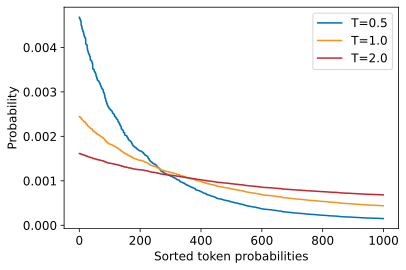

In [21]:
#id temperature
#alt Token probabilities as a function of temperature
#caption Distribution of randomly generated token probabilities for three selected temperatures
import matplotlib.pyplot as plt
import numpy as np

def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum() # ah. this works by for example if you input logits.size() = [200]. You will get 200 different softmax values calculated.

logits = np.exp(np.random.random(1000)) # np.random.random seems to print random values ranging from 0 to 1 in uniform distribution
                                        # with np.exp applied, this will make values range from [0, e]
#print(logits)
sorted_logits = np.sort(logits)[::-1] # sort() sorts logit in ascending order // [::-1] reverses order of sorted array
x = np.arange(1000) # for the x-value, x-cord of 0 to 1000 with incrementation of 1 is printed


for T in [0.5, 1.0, 2.0]:
    plt.step(x, softmax(sorted_logits, T), label=f"T={T}")
plt.legend(loc="best") # tells MatPlotLib to automatically choose the best location to plot legend based on where it would cover the least amount of data points
plt.xlabel("Sorted token probabilities")
plt.ylabel("Probability")
plt.show()

Yes, exactly. If the input `logits` array has a shape of `[200]`, the function will output an array of shape `[200]`, where each element represents the softmax probability of the corresponding logit.

### Detailed Explanation

Let’s say you have an input `logits` array with 200 elements:
```python
logits = np.array([...])  # array of shape [200]
```

### Softmax Function
```python
def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum()
```

1. **Exponentiation with Temperature Scaling**:
    ```python
    e_x = np.exp(logits / T)
    ```
    - Here, `logits` is divided by the temperature `T` (default is 1).
    - `np.exp(logits / T)` computes the exponentials of each element in the `logits` array. This will also produce an array of shape `[200]`.

2. **Normalization**:
    ```python
    return e_x / e_x.sum()
    ```
    - `e_x.sum()` computes the sum of all 200 exponentiated values.
    - Each element in `e_x` is then divided by this sum, resulting in a normalized array of shape `[200]`, where each element is the softmax probability for the corresponding logit.

### Example

Here’s a concrete example with a smaller array to illustrate:

```python
import numpy as np

# Example logits array of shape [3] for simplicity
logits = np.array([2.0, 1.0, 0.5])

def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum()

softmax_probs = softmax(logits)
print(softmax_probs)
```

Output:
```plaintext
[0.62853172 0.2312239  0.14024438]
```

For an array of shape `[200]`, the function works the same way but processes 200 elements:

### Full Example with Shape [200]

```python
import numpy as np

# Example logits array of shape [200]
logits = np.random.randn(200)  # Randomly generated logits for illustration

def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum()

softmax_probs = softmax(logits)
print(softmax_probs)
print(softmax_probs.shape)
```

Output:
```plaintext
[0.006 0.004 0.005 ... 0.006 0.003 0.004]  # Example output, will sum to 1
(200,)  # Shape of the output
```

### Conclusion

If your input `logits` array is of shape `[200]`, the softmax function will output an array of the same shape `[200]`, with each value representing the probability of the corresponding logit after applying the softmax transformation. This ensures that the sum of all 200 probabilities is 1, forming a valid probability distribution.

In [22]:
torch.manual_seed(42);

output_temp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             temperature=2.0, top_k=0)
print(tokenizer.decode(output_temp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


Feed Boost Year Hampe Eagle Rouse Symbol Steal Therefore inappropriate Sprite 69
151 Hill-James Golfne Castle j Runningespantry Spy legislative Trueverlife cone
Hermes mark Central Bombsaver democracy Civil|RosSkill livesvedesc Init scan
buggy metroDunults micro brightly Byrne unusually BBs Radiustool toddlers CAP
contriv itself turtle four 32 Democraticfanson idea cheeserrors Dargontonache
Umb robot Palestrog carrotsinvest



### The Role of `top_k`

- **`top_k`**: It controls the number of highest-probability tokens to keep for sampling.
    - **When `top_k` is set to a positive integer (e.g., 50)**: Only the top-k tokens with the highest probabilities are considered for sampling. This truncates the probability distribution, making the generation process more focused and reducing the likelihood of sampling very low-probability tokens.
    - **When `top_k=0`**: No truncation is applied, meaning the entire vocabulary is considered for sampling based on their probabilities. This allows for maximum diversity but can introduce a higher chance of generating less coherent or contextually appropriate tokens.

### Example Scenarios

- **High `top_k` (e.g., `top_k=50`)**: The model is restricted to choosing from the 50 most likely tokens at each step. This helps maintain coherence and relevance in the generated text.
- **Low `top_k` (e.g., `top_k=0`)**: The model can choose from the entire vocabulary, potentially generating more creative but less predictable text.

### Summary

In your provided code snippet:
- Setting `top_k=0` means that the model samples the next token from the entire vocabulary based on their probabilities.
- With `do_sample=True` and `temperature=2.0`, the generation process will be highly random and diverse, potentially producing creative but less coherent text.

This setup can be useful for tasks where variety and novelty are desired, such as creative writing or brainstorming, but might not be ideal for tasks requiring high accuracy and consistency.

The parameter you're referring to is likely `top_p`, not `top_b`. `top_p` (also known as nucleus sampling) is another strategy used for text generation, which is somewhat related to `top_k` but operates differently.

### Understanding `top_p` (Nucleus Sampling)

**Nucleus sampling** (`top_p`) is a method that limits the sampling pool to a dynamic subset of tokens whose cumulative probability mass exceeds a threshold `p`. This method can adapt the size of the sampling pool based on the context, potentially offering a good balance between diversity and coherence.

### Key Differences from `top_k`

- **`top_k`**: Considers a fixed number of top tokens (k) with the highest probabilities.
- **`top_p`**: Considers a variable number of tokens, such that their cumulative probability is at least `p`.

### How `top_p` Works

1. **Sort the token probabilities** in descending order.
2. **Select the smallest subset** of tokens such that the sum of their probabilities is greater than or equal to `top_p`.
3. **Sample from this subset**.

### Example

Let's break down an example using both `top_k` and `top_p`.

#### Example with `top_k`

Suppose we have the following probabilities for 5 tokens: `[0.4, 0.3, 0.2, 0.05, 0.05]`.

- If `top_k = 3`, we consider the top 3 tokens with the highest probabilities: `[0.4, 0.3, 0.2]`.

#### Example with `top_p`

Using the same probabilities, if `top_p = 0.7`:

1. Sort the probabilities: `[0.4, 0.3, 0.2, 0.05, 0.05]` (already sorted in this example).
2. Start summing from the top until the cumulative probability reaches at least `0.7`:
    - Start with `0.4` (cumulative probability = `0.4`).
    - Add `0.3` (cumulative probability = `0.7`).
3. The subset of tokens considered for sampling is `[0.4, 0.3]`.

### Code Example

Here’s how you might use `top_p` in text generation with the `transformers` library:

```python
import torch

torch.manual_seed(42);

output_temp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             temperature=2.0, top_p=0.9)
print(tokenizer.decode(output_temp[0]))
```

### Parameters Explained

- **`do_sample=True`**: Enables sampling instead of greedy decoding.
- **`temperature=2.0`**: Controls the randomness of predictions. Higher values lead to more diverse outputs.
- **`top_p=0.9`**: Enables nucleus sampling, where the model will consider the smallest set of tokens whose cumulative probability is at least 0.9.

### When to Use `top_p`

- **Improving Diversity**: `top_p` can generate more diverse text by adapting the size of the candidate pool based on the context.
- **Controlling Coherence**: By setting `top_p` to a high value (e.g., 0.9), you ensure that the model considers a diverse but relevant set of tokens, which can balance coherence and creativity.

### Summary

- **`top_k`**: Fixed-size sampling pool based on the top k highest probability tokens.
- **`top_p`**: Variable-size sampling pool based on the cumulative probability of the most probable tokens.

Both parameters can be tuned to achieve the desired level of diversity and coherence in generated text, making them powerful tools for fine-tuning the behavior of language models during generation tasks.

In [26]:
torch.manual_seed(99);

output_temp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             temperature=0.5, top_k=42)
print(tokenizer.decode(output_temp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers had to travel to the remote valley in order to discover the
unicorns' existence. The researchers had to travel to the remote valley in order
to discover the unicorns' existence.

The unicorn herd was discovered in the Andes Mountains, in the Tocopilla Valley,
in Chile. The herd lived in a small valley with a population of about 1,500. The
researchers found


Changing the range of top logits from which you're sampling can significantly affect the behavior and output of a text generation model. Let's explore how this works with both `top_k` and `top_p` sampling methods, and why it's different from always using the highest value.

### Greedy Decoding vs. Sampling

- **Greedy Decoding**: Always picks the token with the highest probability. This method is deterministic and will always produce the same output for a given input. While it ensures high-probability sequences, it can lead to repetitive and less diverse text.
- **Sampling**: Selects tokens based on their probabilities, introducing randomness. This can produce more varied and creative text but may also introduce less coherent sequences if not controlled properly.

### `top_k` Sampling

With `top_k` sampling:
- **Fixed Pool Size**: Only the top k tokens with the highest probabilities are considered for the next token.
- **Increased Diversity**: By expanding the range of k, you allow the model to potentially choose from less likely (but still plausible) tokens, increasing diversity in the generated text.

#### Example

Consider the following probabilities for the next token:
- `[0.5, 0.3, 0.1, 0.05, 0.05]`

If `top_k = 2`, the model will sample from `[0.5, 0.3]`, leading to less diversity but more coherent text.
If `top_k = 5`, the model will sample from all five tokens, including those with lower probabilities, leading to more diverse but potentially less coherent text.

### `top_p` Sampling

With `top_p` (nucleus) sampling:
- **Variable Pool Size**: The pool of tokens is determined dynamically based on their cumulative probability, ensuring that the sum of probabilities is at least `p`.
- **Balanced Diversity and Coherence**: By setting an appropriate `top_p` value, you can balance between coherence and diversity more flexibly than with a fixed `top_k`.

#### Example

Using the same probabilities `[0.5, 0.3, 0.1, 0.05, 0.05]` and `top_p = 0.8`:
- The model will consider the smallest subset whose cumulative probability is at least 0.8. In this case, it will be `[0.5, 0.3]`.

If `top_p = 0.95`, it will consider `[0.5, 0.3, 0.1]`.

### Why Sampling from a Range Matters

- **Increased Diversity**: By sampling from a range of top logits (whether through `top_k` or `top_p`), you allow the model to generate more varied sequences. This can be crucial for applications requiring creativity, such as story or dialogue generation.
- **Avoiding Repetition**: Always picking the highest probability token can lead to repetitive and predictable sequences. Sampling introduces variation, helping to avoid this issue.
- **Contextual Relevance**: While the highest probability token might be the most likely continuation, other tokens within the top range can also be contextually relevant. Sampling can capture these nuances, leading to richer and more engaging text.

### Practical Impact

- **`top_k` and `top_p` Sampling in Practice**: These techniques are often used to fine-tune the trade-off between diversity and coherence. For example, in generating a dialogue, you might prefer a higher `top_k` or `top_p` to ensure the conversation remains engaging and not monotonous.

### Summary

Changing the range of top logits from which you sample introduces variability into the text generation process, enhancing diversity and potentially leading to more interesting and less repetitive outputs. This is crucial in applications where creativity and engagement are important, balancing the model's tendency to generate high-probability but potentially monotonous sequences.

### ONCE SAMPLED BY top_k or top_p THE PROBABILITIES WILL THEN BE RESCALED. AND BASED ON THIS NEW PROBABILITIES CALCULATED, THESE VALUES WILL BE HOW LIKELY EACH VALUE GETS CHOSEN

Yes, exactly. Once the probabilities are rescaled (i.e., normalized to sum to 1), these rescaled probabilities represent how likely each token is to be chosen during the sampling process. This ensures that the sampling process respects the relative probabilities of the tokens as determined by the model.

### Detailed Explanation

Let’s walk through the process step-by-step to make it clearer.

1. **Model Outputs Probabilities**:
   - Suppose the model outputs the following probabilities for the next token: `[0.4, 0.3, 0.2, 0.05, 0.05]`.

2. **Top-k or Top-p Selection**:
   - **Top-k**: If `top_k=2`, we select the top 2 tokens `[0.4, 0.3]`.
   - **Top-p**: If `top_p=0.7`, we select tokens until their cumulative probability reaches at least 0.7, which in this case would also be `[0.4, 0.3]`.

3. **Rescale Probabilities**:
   - The selected probabilities `[0.4, 0.3]` need to be rescaled to sum to 1.
   - The sum of the selected probabilities is `0.4 + 0.3 = 0.7`.
   - Rescaled probabilities are `[0.4/0.7, 0.3/0.7] = [0.571, 0.429]`.

4. **Sampling**:
   - The rescaled probabilities `[0.571, 0.429]` indicate how likely each of the selected tokens is to be chosen.
   - A random token is then selected according to these rescaled probabilities.

### How Sampling Works with Rescaled Probabilities

In practice, here’s what happens:

1. **Generate Random Number**: A random number between 0 and 1 is generated.
2. **Map to Cumulative Probability Distribution**:
   - The cumulative probability distribution is created from the rescaled probabilities. For `[0.571, 0.429]`, the cumulative distribution is `[0.571, 1.0]`.
   - If the random number falls between 0 and 0.571, the first token is chosen.
   - If the random number falls between 0.571 and 1.0, the second token is chosen.

### Example in Code

Let’s implement this in Python to illustrate:

```python
import numpy as np

# Original probabilities
probabilities = np.array([0.4, 0.3, 0.2, 0.05, 0.05])

# Top-k selection (k=2)
top_k = 2
top_k_indices = np.argsort(probabilities)[-top_k:]
top_k_probs = probabilities[top_k_indices]

# Rescale probabilities
rescaled_probs = top_k_probs / top_k_probs.sum()

# Show rescaled probabilities
print(f"Top-k indices: {top_k_indices}")
print(f"Rescaled probabilities: {rescaled_probs}")

# Sample from rescaled probabilities
sampled_index = np.random.choice(top_k_indices, p=rescaled_probs)
print(f"Sampled index: {sampled_index}")
```

### Output

This code will output the indices of the top-k tokens, their rescaled probabilities, and the index of the sampled token. The sampling is performed according to the rescaled probabilities.

### Summary

After the top-k or top-p tokens are selected, their probabilities are rescaled to sum to 1. These rescaled probabilities directly determine how likely each token is to be chosen during sampling. This ensures that the sampling process respects the model’s relative confidence in each token, allowing for both diversity and coherence in the generated text.

### Top-k and Nucleus Sampling

In [27]:
torch.manual_seed(42);

input_txt = """In a shocking finding, scientist discovered \
a herd of unicorns living in a remote, previously unexplored \
valley, in the Andes Mountains. Even more surprising to the \
researchers was the fact that the unicorns spoke perfect English.\n\n
"""
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)

In [28]:
import torch.nn.functional as F

with torch.no_grad():
    output = model(input_ids=input_ids)
    next_token_logits = output.logits[:, -1, :]
    probs = F.softmax(next_token_logits, dim=-1).detach().cpu().numpy()

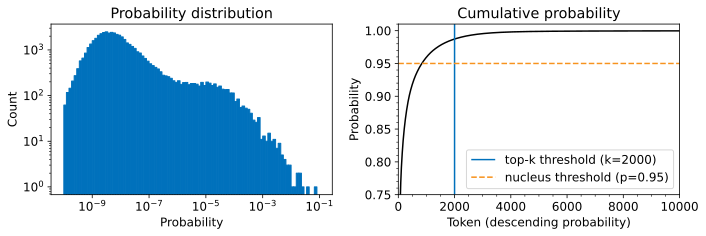

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

axes[0].hist(probs[0], bins=np.logspace(-10, -1, 100), color="C0", edgecolor="C0")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Probability distribution")
axes[0].set_xlabel("Probability")
axes[0].set_ylabel("Count")
#axes[0].grid(which="major")

axes[1].plot(np.cumsum(np.sort(probs[0])[::-1]), color="black")
axes[1].set_xlim([0, 10000])
axes[1].set_ylim([0.75, 1.01])
axes[1].set_title("Cumulative probability")
axes[1].set_ylabel("Probability")
axes[1].set_xlabel("Token (descending probability)")
#axes[1].grid(which="major")
axes[1].minorticks_on()
#axes[1].grid(which='minor', linewidth='0.5')
top_k_label = 'top-k threshold (k=2000)'
top_p_label = 'nucleus threshold (p=0.95)'
axes[1].vlines(x=2000, ymin=0, ymax=2, color='C0', label=top_k_label)
axes[1].hlines(y=0.95, xmin=0, xmax=10000, color='C1', label=top_p_label, linestyle='--')
axes[1].legend(loc='lower right')
plt.tight_layout()

In [30]:
torch.manual_seed(42);

output_topk = model.generate(input_ids, max_length=max_length, do_sample=True,
                             top_k=50)
print(tokenizer.decode(output_topk[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


To get to the mountains, the unicorn hunters began by travelling on horseback
with a guide, and eventually reached the summit of the mountain, which was
filled with a dense forest. The unicorns also spoke fluent Chinese. The first
thing the group heard from the unicorn was "Ding! duh dzang!", literally "papa,
there".


The hunters discovered that the unicorns


In [31]:
# refer to book but
      # top_k helps in preventing the risk of highly unlikely word from being chosen at all, which leads to poor quality words
      # top_p also helps in producing coherent stories, as the front few higher values tends to dominate the smaller ones
            # these 2 metric can be used concurrently, to get best of both worlds

torch.manual_seed(42);

output_topp = model.generate(input_ids, max_length=max_length, do_sample=True,
                             top_p=0.90)
print(tokenizer.decode(output_topp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


To get to the unicorn herd, the researchers began by travelling about 1,800
kilometers through the Andes. Once there, the scientists found a village filled
with a herd of more than 300 unicorns, each with its own specific personality.
Each unicorn spoke perfect English, which the team described as "very unlike any
other known creature in the world."

Advertisement

"The first thought we had
